 # Tests on PDA

In [1]:
import sys
sys.path[0:0] = ['../..', '../../3rdparty'] # Append to the beginning of the search path
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



__IMPORTANT: Must time-bound explore-pda, run-pda, explore-tm, etc so that loops are caught__

In [2]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)


In [3]:
repda

{'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', '#'): {('F', '#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')}},
 'F': {'F'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'q0': 'I',
 'z0': '#'}

In [4]:
DO_repda = dotObj_pda(repda, FuseEdges=True)

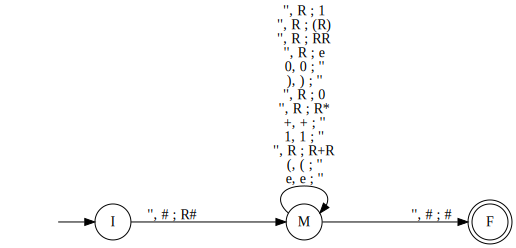

In [5]:
DO_repda

In [6]:
explore_pda("0", repda, STKMAX=4)

*** Exploring wrt STKMAX=  4 ; increase it if needed ***
*** Exploring wrt STKMAX =  4 ; increase it if needed ***
String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [7]:
explore_pda("00", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 00 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00', '#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [8]:
explore_pda("(0)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)', '#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [9]:
explore_pda("(00)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (00) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(00)', '#')
->  ('M', '(00)', 'R#')
->  ('M', '(00)', '(R)#')
->  ('M', '00)', 'R)#')
->  ('M', '00)', 'RR)#')
->  ('M', '00)', '0R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [10]:
explore_pda("(0)(0)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [11]:
explore_pda("(0)(0)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [12]:
explore_pda("0+0", repda, STKMAX=3)

*** Exploring wrt STKMAX=  3 ; increase it if needed ***
*** Exploring wrt STKMAX =  3 ; increase it if needed ***
String 0+0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0+0', '#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [13]:
explore_pda("0+0", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 0+0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0+0', '#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [14]:
explore_pda("(0)(0)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [15]:
explore_pda("(0)+(0)", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String (0)+(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)+(0)', '#')
->  ('M', '(0)+(0)', 'R#')
->  ('M', '(0)+(0)', 'R+R#')
->  ('M', '(0)+(0)', '(R)+R#')
->  ('M', '0)+(0)', 'R)+R#')
->  ('M', '0)+(0)', '0)+R#')
->  ('M', ')+(0)', ')+R#')
->  ('M', '+(0)', '+R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [16]:
explore_pda("00+0", repda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 00+0 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00+0', 'RR+R#')
->  ('M', '00+0', '0R+R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'RR#')
->  ('M', '00+0', '0R#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [17]:
explore_pda("000", repda, STKMAX=3)

*** Exploring wrt STKMAX=  3 ; increase it if needed ***
*** Exploring wrt STKMAX =  3 ; increase it if needed ***
String 000 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', '0R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', 'RRR#')
->  ('M', '000', '0RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [18]:
explore_pda("00+00", repda, STKMAX=4)

*** Exploring wrt STKMAX=  4 ; increase it if needed ***
*** Exploring wrt STKMAX =  4 ; increase it if needed ***
String 00+00 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', '0R#')
->  ('M', '0+00', 'R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda("00+00", repda, STKMAX=5)

*** Exploring wrt STKMAX=  5 ; increase it if needed ***
*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 00+00 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', '0R#')
->  ('M', '0+00', 'R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state

In [20]:
explore_pda("0000+0", repda, STKMAX=5)

*** Exploring wrt STKMAX=  5 ; increase it if needed ***
*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 0000+0 accepted by your PDA in 10 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0000+0', '#')
->  ('M', '0000+0', 'R#')
->  ('M', '0000+0', 'R+R#')
->  ('M', '0000+0', 'RR+R#')
->  ('M', '0000+0', '0R+R#')
->  ('M', '000+0', 'R+R#')
->  ('M', '000+0', 'RR+R#')
->  ('M', '000+0', '0R+R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00+0', 'RR+R#')
->  ('M', '00+0', '0R+R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0000+0', '#')
->  ('M', '0000+0', 'R#')
->  ('M', '0000+0', 'R+R#')
->  ('M', '0000+0', 'RR+R#')
->  ('M', '0000+0', 'RRR+R#')
->  ('M', '0000+0', '0RR+R#')
->  ('M', '000+0', 'RR+R#')
->  ('M', '000+0', '0R+R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00

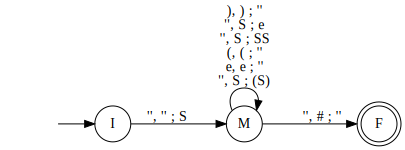

In [21]:
brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda, FuseEdges=True)


In [23]:
explore_pda("(e)", brpda, STKMAX=3)

*** Exploring wrt STKMAX=  3 ; increase it if needed ***
*** Exploring wrt STKMAX =  3 ; increase it if needed ***
String (e) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', '(e)', '#')
->  ('M', '(e)', 'S#')
->  ('M', '(e)', '(S)#')
->  ('M', 'e)', 'S)#')
->  ('M', 'e)', 'e)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '') .


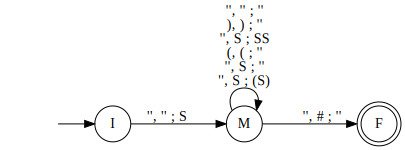

In [24]:
brpda1 = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; ''    -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : '',  ''  ; ''  -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda1, FuseEdges=True)

In [25]:
explore_pda("('')", brpda1, STKMAX=0)

*** Exploring wrt STKMAX=  0 ; increase it if needed ***
*** Exploring wrt STKMAX =  0 ; increase it if needed ***
String ('') rejected by your PDA :-(
Visited states are:
{('M', "('')", 'S#'), ('F', "('')", ''), ('I', "('')", '#'), ('M', "('')", '#')}


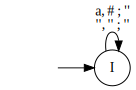

In [26]:
brpda2 = md2mc('''PDA
 I : a, #; '' -> I
 I : '', '' ; '' -> I''')
dotObj_pda(brpda2, FuseEdges=True)

In [27]:
explore_pda("a", brpda2, STKMAX=1)

*** Exploring wrt STKMAX=  1 ; increase it if needed ***
*** Exploring wrt STKMAX =  1 ; increase it if needed ***
String a rejected by your PDA :-(
Visited states are:
{('I', 'a', '#'), ('I', '', '')}


In [28]:
explore_pda("a", brpda1, STKMAX=1)

*** Exploring wrt STKMAX=  1 ; increase it if needed ***
*** Exploring wrt STKMAX =  1 ; increase it if needed ***
String a rejected by your PDA :-(
Visited states are:
{('F', 'a', ''), ('M', 'a', '#'), ('M', 'a', 'S#'), ('I', 'a', '#')}


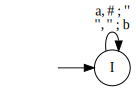

In [29]:
brpda3 = md2mc('''PDA
 I : a, #; '' -> I
 I : '', '' ; b -> I''')
dotObj_pda(brpda3, FuseEdges=True)

In [30]:
explore_pda("a", brpda3, STKMAX=7)

*** Exploring wrt STKMAX=  7 ; increase it if needed ***
*** Exploring wrt STKMAX =  7 ; increase it if needed ***
String a rejected by your PDA :-(
Visited states are:
{('I', 'a', 'bbbbb#'), ('I', 'a', 'bbbb#'), ('I', 'a', '#'), ('I', 'a', 'bb#'), ('I', 'a', 'b#'), ('I', '', ''), ('I', 'a', 'bbb#'), ('I', 'a', 'bbbbbb#')}


In [31]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

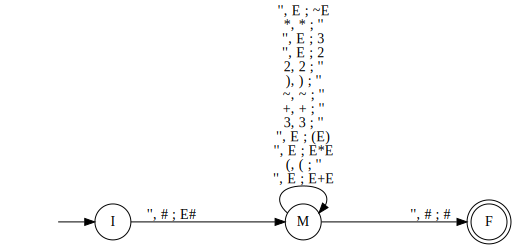

In [32]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [33]:
DOpdaEamb.source

'// PO_St6\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tM [label=M peripheries=1 shape=circle]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> M [label="\'\', # ; E#"]\n\t\t\tM -> M [label="\'\', E ; ~E \n *, * ; \'\' \n \'\', E ; 3 \n \'\', E ; 2 \n 2, 2 ; \'\' \n ), ) ; \'\' \n ~, ~ ; \'\' \n +, + ; \'\' \n 3, 3 ; \'\' \n \'\', E ; (E) \n \'\', E ; E*E \n (, ( ; \'\' \n \'\', E ; E+E"]\n\t\t\tM -> F [label="\'\', # ; #"]\n}'

In [34]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

*** Exploring wrt STKMAX=  5 ; increase it if needed ***
*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 3+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [35]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

*** Exploring wrt STKMAX=  7 ; increase it if needed ***
*** Exploring wrt STKMAX =  7 ; increase it if needed ***
String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E*E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E*E#')
->  ('M', '3+2*3+2*3', '3+E*E*E#')
->  ('M', '+2*3+2*3', '+E*E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
->  ('M', '2*3+2*3', '2*E*E#')
->  ('M', '*3+2*3', '*E*E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E#')
->  ('M', '3

In [36]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

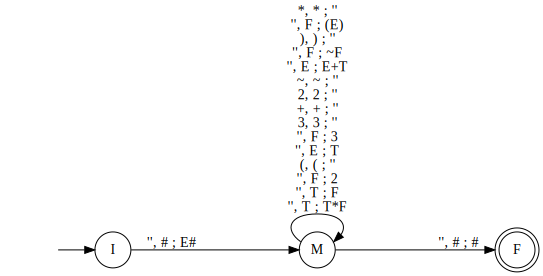

In [37]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [38]:
DOpdaE.source

'// PO_St7\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tM [label=M peripheries=1 shape=circle]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> M [label="\'\', # ; E#"]\n\t\t\tM -> M [label="*, * ; \'\' \n \'\', F ; (E) \n ), ) ; \'\' \n \'\', F ; ~F \n \'\', E ; E+T \n ~, ~ ; \'\' \n 2, 2 ; \'\' \n +, + ; \'\' \n 3, 3 ; \'\' \n \'\', F ; 3 \n \'\', E ; T \n (, ( ; \'\' \n \'\', F ; 2 \n \'\', T ; F \n \'\', T ; T*F"]\n\t\t\tM -> F [label="\'\', # ; #"]\n}'

In [39]:
explore_pda("2+2*3", pdaE, STKMAX=7)

*** Exploring wrt STKMAX=  7 ; increase it if needed ***
*** Exploring wrt STKMAX =  7 ; increase it if needed ***
String 2+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2+2*3', '#')
->  ('M', '2+2*3', 'E#')
->  ('M', '2+2*3', 'E+T#')
->  ('M', '2+2*3', 'T+T#')
->  ('M', '2+2*3', 'F+T#')
->  ('M', '2+2*3', '2+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [40]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

*** Exploring wrt STKMAX=  7 ; increase it if needed ***
*** Exploring wrt STKMAX =  7 ; increase it if needed ***
String 3+2*3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+T#')
->  ('M', '3+2*3+2*3', 'E+T+T#')
->  ('M', '3+2*3+2*3', 'T+T+T#')
->  ('M', '3+2*3+2*3', 'F+T+T#')
->  ('M', '3+2*3+2*3', '3+T+T#')
->  ('M', '+2*3+2*3', '+T+T#')
->  ('M', '2*3+2*3', 'T+T#')
->  ('M', '2*3+2*3', 'T*F+T#')
->  ('M', '2*3+2*3', 'F*F+T#')
->  ('M', '2*3+2*3', '2*F+T#')
->  ('M', '*3+2*3', '*F+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [41]:
explore_pda("3*2*~3+~~3*~3", pdaE, STKMAX=10)

*** Exploring wrt STKMAX=  10 ; increase it if needed ***
*** Exploring wrt STKMAX =  10 ; increase it if needed ***
String 3*2*~3+~~3*~3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E+T#')
->  ('M', '3*2*~3+~~3*~3', 'T+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'F*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', '3*F*F+T#')
->  ('M', '*2*~3+~~3*~3', '*F*F+T#')
->  ('M', '2*~3+~~3*~3', 'F*F+T#')
->  ('M', '2*~3+~~3*~3', '2*F+T#')
->  ('M', '*~3+~~3*~3', '*F+T#')
->  ('M', '~3+~~3*~3', 'F+T#')
->  ('M', '~3+~~3*~3', '~F+T#')
->  ('M', '3+~~3*~3', 'F+T#')
->  ('M', '3+~~3*~3', '3+T#')
->  ('M', '+~~3*~3', '+T#')
->  ('M', '~~3*~3', 'T#')
->  ('M', '~~3*~3', 'T*F#')
->  ('M', '~~3*~3', 'F*F#')
->  ('M', '~~3*~3', '~F*F#')
->  ('M', '~3*~3', 'F*F#')
->  ('M', '~3*~3', '~F*F#')
->  ('M', '3

In [42]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=8)

*** Exploring wrt STKMAX=  8 ; increase it if needed ***
*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 3*2*~3+~~3*~3 accepted by your PDA in 36 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E*E*E#')
->  ('M', '*2*~3+~~3*~3', '*E*E*E#')
->  ('M', '2*~3+~~3*~3', 'E*E*E#')
->  ('M', '2*~3+~~3*~3', '2*E*E#')
->  ('M', '*~3+~~3*~3', '*E*E#')
->  ('M', '~3+~~3*~3', 'E*E#')
->  ('M', '~3+~~3*~3', 'E+E*E#')
->  ('M', '~3+~~3*~3', '~E+E*E#')
->  ('M', '3+~~3*~3', 'E+E*E#')
->  ('M', '3+~~3*~3', '3+E*E#')
->  ('M', '+~~3*~3', '+E*E#')
->  ('M', '~~3*~3', 'E*E#')
->  ('M', '~~3*~3', '~E*E#')
->  ('M', '~3*~3', 'E*E#')
->  ('M', '~3*~3', '~E*E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->

->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E#')
->  ('M', '*2*~3+~~3*~3', '*E#')
->  ('M', '2*~3+~~3*~3', 'E#')
->  ('M', '2*~3+~~3*~3', 'E*E#')
->  ('M', '2*~3+~~3*~3', '2*E#')
->  ('M', '*~3+~~3*~3', '*E#')
->  ('M', '~3+~~3*~3', 'E#')
->  ('M', '~3+~~3*~3', '~E#')
->  ('M', '3+~~3*~3', 'E#')
->  ('M', '3+~~3*~3', 'E*E#')
->  ('M', '3+~~3*~3', 'E+E*E#')
->  ('M', '3+~~3*~3', '3+E*E#')
->  ('M', '+~~3*~3', '+E*E#')
->  ('M', '~~3*~3', 'E*E#')
->  ('M', '~~3*~3', '~E*E#')
->  ('M', '~3*~3', 'E*E#')
->  ('M', '~3*~3', '~E*E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M',